<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x = "t.strain.1"
y1 = "t.stress.1"
y2 = "hard.Rate.1"

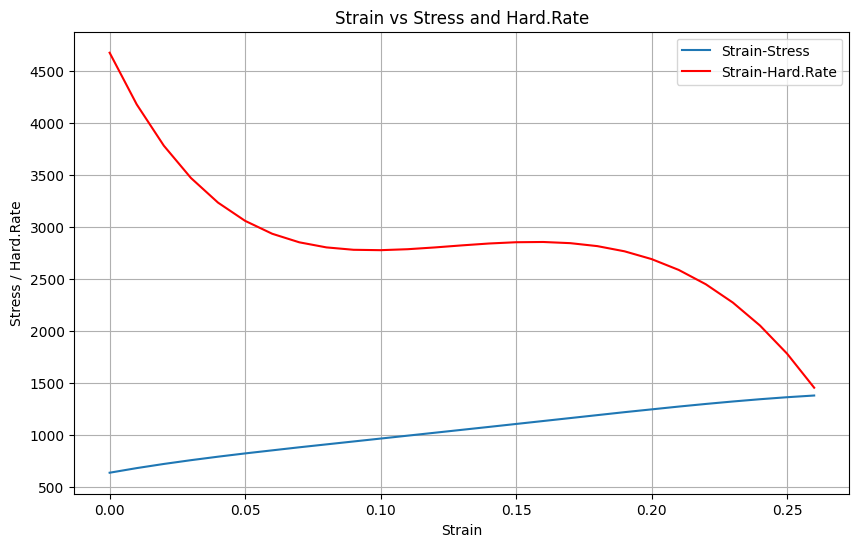

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Data.xlsx')

# Extracting data for strain-stress plot
strain_stress_data = df[[x, y1]]

# Extracting data for strain-hard.rate plot
strain_hard_rate_data = df[[x, y2]]

# Plotting both curves in a single plot
plt.figure(figsize=(10, 6))

# Plot strain-stress curve
plt.plot(strain_stress_data[x], strain_stress_data[y1], label='Strain-Stress')

# Plot strain-hard.rate curve with a different color
plt.plot(strain_hard_rate_data[x], strain_hard_rate_data[y2], label='Strain-Hard.Rate', color='red')

# Adding labels and title
plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Strain vs Stress and Hard.Rate')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Generate the equations of the graph and find the Intersection point

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x_strain_stress = df[x].values
y_strain_stress = df[y1].values

x_strain_hard_rate = df[x].values
y_strain_hard_rate = df[y2].values

# Check for and handle NaN or infinite values for strain-stress curve
mask_strain_stress = np.isfinite(x_strain_stress) & np.isfinite(y_strain_stress)
x_strain_stress = x_strain_stress[mask_strain_stress]
y_strain_stress = y_strain_stress[mask_strain_stress]

# Check for and handle NaN or infinite values for strain-hard.rate curve
mask_strain_hard_rate = np.isfinite(x_strain_hard_rate) & np.isfinite(y_strain_hard_rate)
x_strain_hard_rate = x_strain_hard_rate[mask_strain_hard_rate]
y_strain_hard_rate = y_strain_hard_rate[mask_strain_hard_rate]

# Set the value of k for spline interpolation for strain-stress curve
k_value_strain_stress = 5

# Set the value of k for spline interpolation for strain-hard.rate curve
k_value_strain_hard_rate = 2

# Perform cubic spline interpolation for strain-stress curve
spline_interp_strain_stress = make_interp_spline(x_strain_stress, y_strain_stress, k=k_value_strain_stress)

# Perform cubic spline interpolation for strain-hard.rate curve
spline_interp_strain_hard_rate = make_interp_spline(x_strain_hard_rate, y_strain_hard_rate, k=k_value_strain_hard_rate)

# Fit cubic polynomial to the entire dataset for strain-stress curve
coefficients_strain_stress = np.polyfit(x_strain_stress, y_strain_stress, k_value_strain_stress)
cubic_equation_strain_stress = np.poly1d(coefficients_strain_stress)

# Fit cubic polynomial to the entire dataset for strain-hard.rate curve
coefficients_strain_hard_rate = np.polyfit(x_strain_hard_rate, y_strain_hard_rate, k_value_strain_hard_rate)
cubic_equation_strain_hard_rate = np.poly1d(coefficients_strain_hard_rate)

# Print the coefficients and equations
print("Equation for Strain-Stress Curve:")
print(cubic_equation_strain_stress)
print()

print("Equation for Strain-Hard.Rate Curve:")
print(cubic_equation_strain_hard_rate)


# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = cubic_equation_strain_stress(x) - y
    eq2 = cubic_equation_strain_hard_rate(x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate stress and hard rate at the intersection point
strain_intersection = intersection_point[0]
stress_intersection = cubic_equation_strain_stress(strain_intersection)
hard_rate_intersection = cubic_equation_strain_hard_rate(strain_intersection)

# Print the intersection point
print("Intersection Point (Strain, Stress, Hard.Rate):", (strain_intersection, stress_intersection, hard_rate_intersection))


Equation for Strain-Stress Curve:
           5             4             3             2
2.768e+05 x - 3.919e+05 x + 1.545e+05 x - 2.541e+04 x + 4644 x + 635.1

Equation for Strain-Hard.Rate Curve:
           2
1.245e+04 x - 1.02e+04 x + 3899
Intersection Point (Strain, Stress, Hard.Rate): (0.33470692967953536, 1379.1803200201457, 1880.2964686338976)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Equation for Strain-Stress Curve:
           5             4             3             2
3.919e+05 x - 3.935e+05 x + 1.408e+05 x - 2.294e+04 x + 4581 x + 650.6

Equation for Strain-Hard.Rate Curve:
       5             4            3             2
7.314 x + 1.959e+06 x - 1.57e+06 x + 4.201e+05 x - 4.546e+04 x + 4558
Intersection Point (Strain, Stress, Hard.Rate): (0.3351082210014215, 1603.019442144374, 2129.8758203815314)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


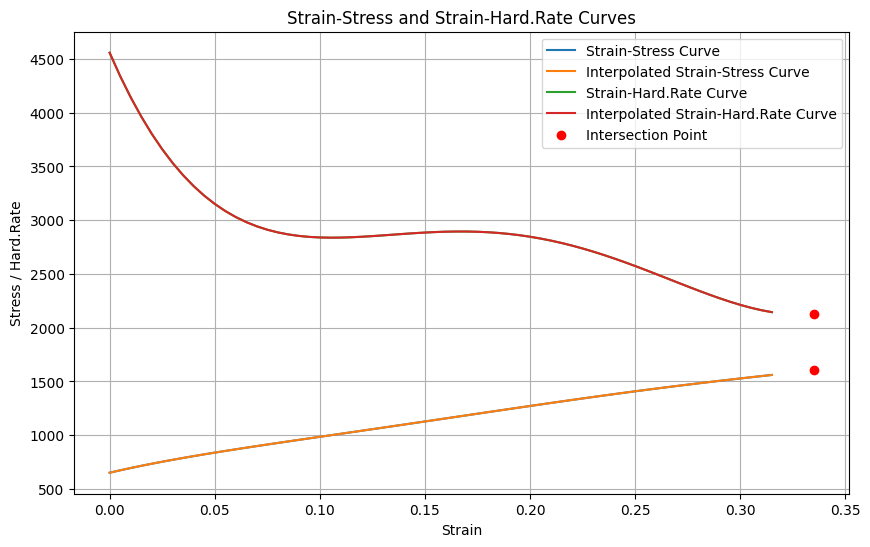

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x_strain_stress = df['t.strain'].values
y_strain_stress = df['t.stress'].values

x_strain_hard_rate = df['t.strain'].values
y_strain_hard_rate = df['hard.Rate'].values

# Check for and handle NaN or infinite values for strain-stress curve
mask_strain_stress = np.isfinite(x_strain_stress) & np.isfinite(y_strain_stress)
x_strain_stress = x_strain_stress[mask_strain_stress]
y_strain_stress = y_strain_stress[mask_strain_stress]

# Check for and handle NaN or infinite values for strain-hard.rate curve
mask_strain_hard_rate = np.isfinite(x_strain_hard_rate) & np.isfinite(y_strain_hard_rate)
x_strain_hard_rate = x_strain_hard_rate[mask_strain_hard_rate]
y_strain_hard_rate = y_strain_hard_rate[mask_strain_hard_rate]

# Set the value of k for spline interpolation for strain-stress curve
k_value_strain_stress = 5

# Set the value of k for spline interpolation for strain-hard.rate curve
k_value_strain_hard_rate = 5

# Perform cubic spline interpolation for strain-stress curve
spline_interp_strain_stress = make_interp_spline(x_strain_stress, y_strain_stress, k=k_value_strain_stress)

# Perform cubic spline interpolation for strain-hard.rate curve
spline_interp_strain_hard_rate = make_interp_spline(x_strain_hard_rate, y_strain_hard_rate, k=k_value_strain_hard_rate)

# Fit cubic polynomial to the entire dataset for strain-stress curve
coefficients_strain_stress = np.polyfit(x_strain_stress, y_strain_stress, k_value_strain_stress)
cubic_equation_strain_stress = np.poly1d(coefficients_strain_stress)

# Fit cubic polynomial to the entire dataset for strain-hard.rate curve
coefficients_strain_hard_rate = np.polyfit(x_strain_hard_rate, y_strain_hard_rate, k_value_strain_hard_rate)
cubic_equation_strain_hard_rate = np.poly1d(coefficients_strain_hard_rate)

# Print the coefficients and equations
print("Equation for Strain-Stress Curve:")
print(cubic_equation_strain_stress)
print()

print("Equation for Strain-Hard.Rate Curve:")
print(cubic_equation_strain_hard_rate)


# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = cubic_equation_strain_stress(x) - y
    eq2 = cubic_equation_strain_hard_rate(x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate stress and hard rate at the intersection point
strain_intersection = intersection_point[0]
stress_intersection = cubic_equation_strain_stress(strain_intersection)
hard_rate_intersection = cubic_equation_strain_hard_rate(strain_intersection)

# Print the intersection point
print("Intersection Point (Strain, Stress, Hard.Rate):", (strain_intersection, stress_intersection, hard_rate_intersection))

# Plot the curves
plt.figure(figsize=(10, 6))

# Plot strain-stress curve
plt.plot(x_strain_stress, y_strain_stress, label='Strain-Stress Curve')
plt.plot(x_strain_stress, spline_interp_strain_stress(x_strain_stress), label='Interpolated Strain-Stress Curve')

# Plot strain-hard.rate curve
plt.plot(x_strain_hard_rate, y_strain_hard_rate, label='Strain-Hard.Rate Curve')
plt.plot(x_strain_hard_rate, spline_interp_strain_hard_rate(x_strain_hard_rate), label='Interpolated Strain-Hard.Rate Curve')

# Plot intersection point
plt.scatter(strain_intersection, stress_intersection, color='red', label='Intersection Point')
plt.scatter(strain_intersection, hard_rate_intersection, color='red')

plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Strain-Stress and Strain-Hard.Rate Curves')
plt.legend()
plt.grid(True)
plt.show()


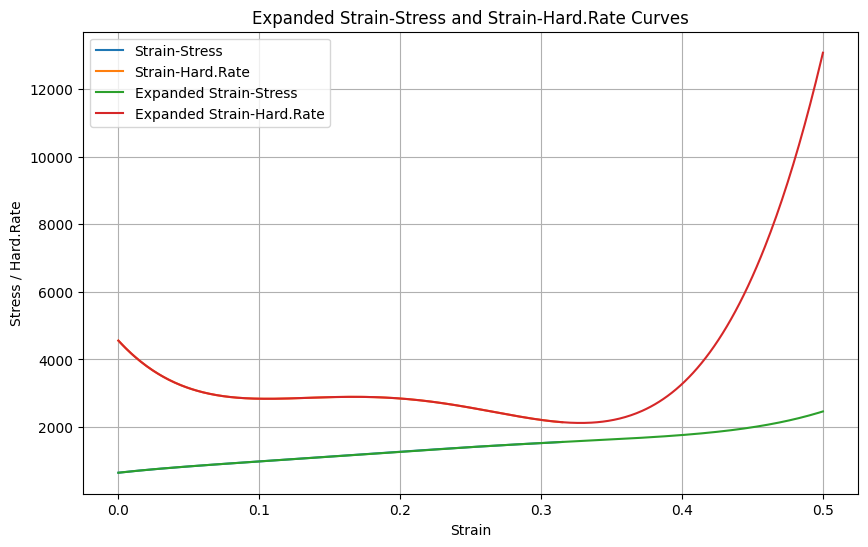

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract strain, stress, and hard.rate data
strain = df['t.strain']
stress = df['t.stress']
hard_rate = df['hard.Rate']

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label='Strain-Stress')
plt.plot(strain, hard_rate, label='Strain-Hard.Rate')

# Generate strain values for expansion up to x = 0.6
expanded_strain = np.linspace(min(strain), 0.5, 500)

# Plot expanded Strain-Stress curve using the first equation
# Here you would use your first equation, cubic_equation_strain_stress
expanded_stress = cubic_equation_strain_stress(expanded_strain)
plt.plot(expanded_strain, expanded_stress, label='Expanded Strain-Stress')

# Plot expanded Strain-Hard.Rate curve using the second equation
# Here you would use your second equation, cubic_equation_strain_hard_rate
expanded_hard_rate = cubic_equation_strain_hard_rate(expanded_strain)
plt.plot(expanded_strain, expanded_hard_rate, label='Expanded Strain-Hard.Rate')

plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Expanded Strain-Stress and Strain-Hard.Rate Curves')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


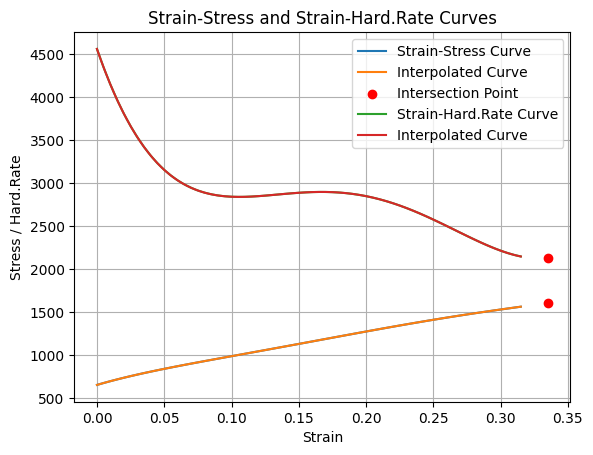

Intersection Point (Strain, Stress, Hard.Rate): (0.3351082210014215, 1603.019442144374, 2129.8758203815314)


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x_strain_stress = df['t.strain'].values
y_strain_stress = df['t.stress'].values

x_strain_hard_rate = df['t.strain'].values
y_strain_hard_rate = df['hard.Rate'].values

# Check for and handle NaN or infinite values for strain-stress curve
mask_strain_stress = np.isfinite(x_strain_stress) & np.isfinite(y_strain_stress)
x_strain_stress = x_strain_stress[mask_strain_stress]
y_strain_stress = y_strain_stress[mask_strain_stress]

# Check for and handle NaN or infinite values for strain-hard.rate curve
mask_strain_hard_rate = np.isfinite(x_strain_hard_rate) & np.isfinite(y_strain_hard_rate)
x_strain_hard_rate = x_strain_hard_rate[mask_strain_hard_rate]
y_strain_hard_rate = y_strain_hard_rate[mask_strain_hard_rate]

# Set the value of k for spline interpolation for strain-stress curve
k_value_strain_stress = 5

# Set the value of k for spline interpolation for strain-hard.rate curve
k_value_strain_hard_rate = 5

# Perform cubic spline interpolation for strain-stress curve
spline_interp_strain_stress = make_interp_spline(x_strain_stress, y_strain_stress, k=k_value_strain_stress)

# Perform cubic spline interpolation for strain-hard.rate curve
spline_interp_strain_hard_rate = make_interp_spline(x_strain_hard_rate, y_strain_hard_rate, k=k_value_strain_hard_rate)

# Fit cubic polynomial to the entire dataset for strain-stress curve
coefficients_strain_stress = np.polyfit(x_strain_stress, y_strain_stress, k_value_strain_stress)
cubic_equation_strain_stress = np.poly1d(coefficients_strain_stress)

# Fit cubic polynomial to the entire dataset for strain-hard.rate curve
coefficients_strain_hard_rate = np.polyfit(x_strain_hard_rate, y_strain_hard_rate, k_value_strain_hard_rate)
cubic_equation_strain_hard_rate = np.poly1d(coefficients_strain_hard_rate)

# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = cubic_equation_strain_stress(x) - y
    eq2 = cubic_equation_strain_hard_rate(x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate stress and hard rate at the intersection point
strain_intersection = intersection_point[0]
stress_intersection = cubic_equation_strain_stress(strain_intersection)
hard_rate_intersection = cubic_equation_strain_hard_rate(strain_intersection)

# Plot the strain-stress curve
plt.plot(x_strain_stress, y_strain_stress, label='Strain-Stress Curve')
plt.plot(np.linspace(min(x_strain_stress), max(x_strain_stress), 100), spline_interp_strain_stress(np.linspace(min(x_strain_stress), max(x_strain_stress), 100)), label='Interpolated Curve')
plt.scatter(strain_intersection, stress_intersection, color='red', label='Intersection Point')

# Plot the strain-hard.rate curve
plt.plot(x_strain_hard_rate, y_strain_hard_rate, label='Strain-Hard.Rate Curve')
plt.plot(np.linspace(min(x_strain_hard_rate), max(x_strain_hard_rate), 100), spline_interp_strain_hard_rate(np.linspace(min(x_strain_hard_rate), max(x_strain_hard_rate), 100)), label='Interpolated Curve')
plt.scatter(strain_intersection, hard_rate_intersection, color='red')

# Add labels and legend
plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Strain-Stress and Strain-Hard.Rate Curves')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the intersection point
print("Intersection Point (Strain, Stress, Hard.Rate):", (strain_intersection, stress_intersection, hard_rate_intersection))
